## Setup

In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Raw Dataset

In [4]:
df = pd.read_csv(
    '../data/raw/iris/iris.data', 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### There are 150 instances, 4 features, and 1 target

## Data Typees and Missing Values

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### The features are already floats, so no changes are needed there. We will need to do something with the target variable since it is categorical but currently represeted as a string

In [16]:
_ = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### There are no missing values in this dataset

## Histograms

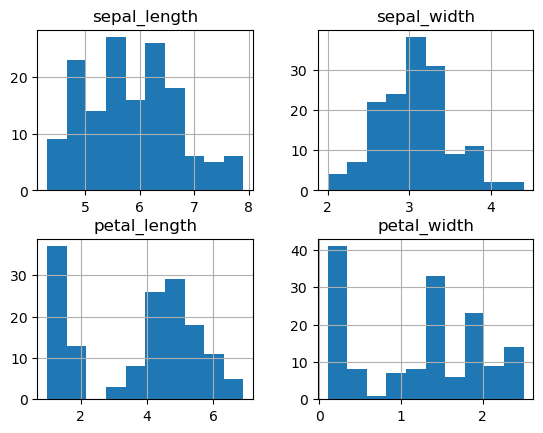

In [7]:
_ = df.hist()

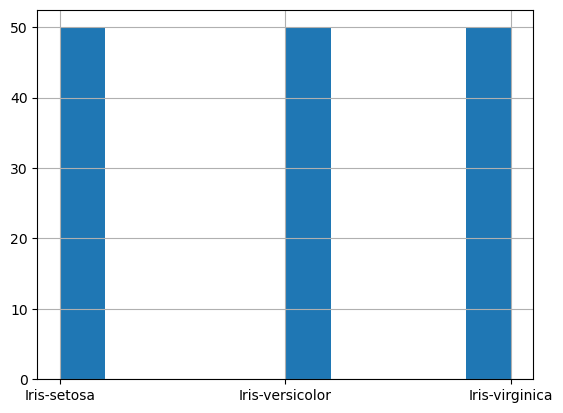

In [21]:
_ = df['species'].hist()

### I don't notice any potential sentinel values in the `sepal` columns. `petal` looked like there may be sentinel values, but after looking at unique values for those columns it looks fine.
### Species also has an equal number of each species type

In [12]:
df['petal_length'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [13]:
df['petal_width'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

## Describe

In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### All instances are non-null which is expeected
### Looking at the `std`, we can see there is large spread in `petal_length`, `petal_width`, and `sepal_width` dists
### The min indicates that there are no sentinel values in this dataset
### The quartiles show that there is not unreasonable spread in the dataset

## Plotting Target against 1 Input Variable

### Scatter

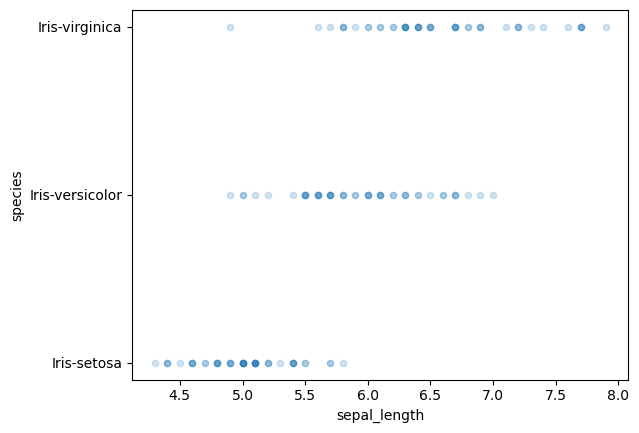

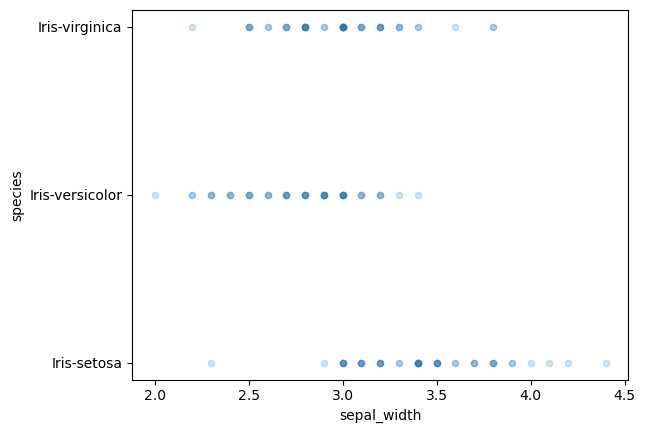

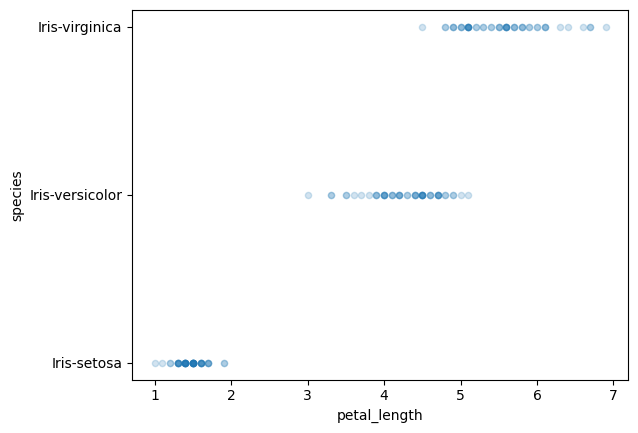

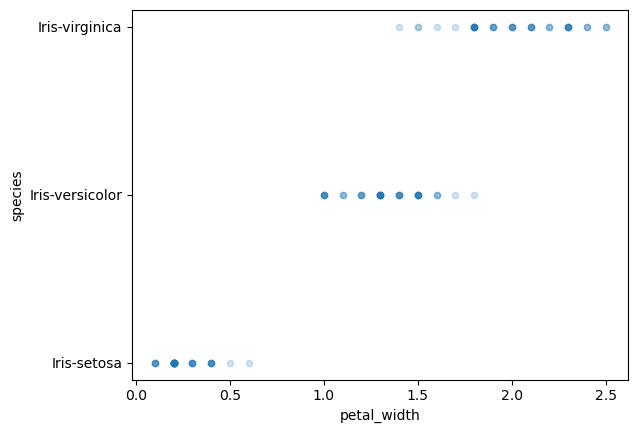

In [26]:
for c in df.columns:
    if c != "species":
        df.plot.scatter(c, "species", alpha=.2)

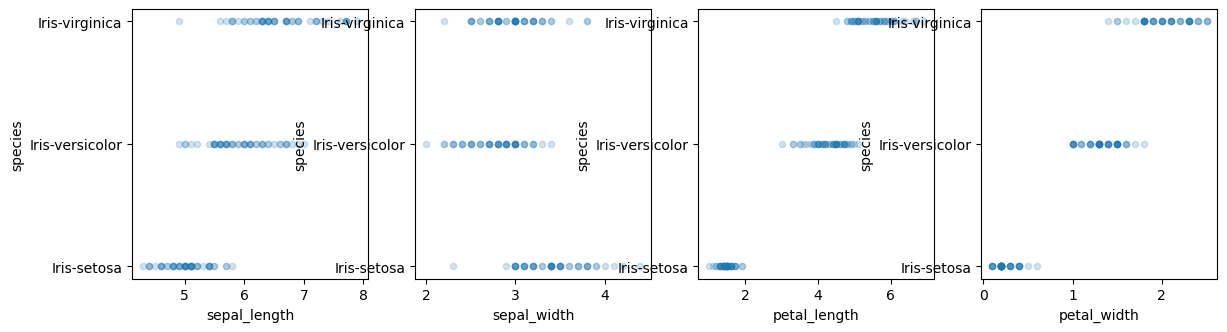

In [33]:
# Another view of the same plots
plot_columns = [c for c in df.columns if c != "species"]
num_cols = 4
num_rows = (len(plot_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(plot_columns):
    plt.subplot(num_rows, num_cols, i+1)
    df.plot.scatter(c, "species", alpha=.2, ax=plt.gca())
    plt.xlabel(c)
    plt.ylabel("species")


#### We can see that all the features seem to be able to separate the Species. Out of the features, the `petal` features are the best separators.
#### We can skip checking boxplots since target is categorical

## Visualizing Relationships Between Columns

### Scatter Matrix Colored by Species

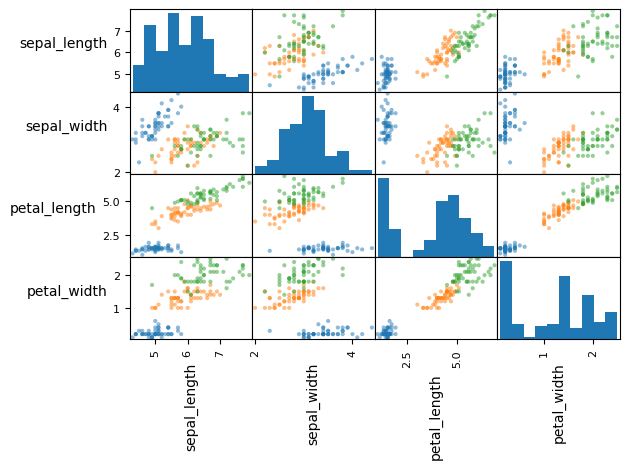

In [47]:
df_colored = df.copy()
df_colored["color"] = df_colored["species"].map(
    dict(
        zip(df_colored['species'].unique(), plt.rcParams['axes.prop_cycle'].by_key()['color'])
    )
) 
axes = pd.plotting.scatter_matrix(df_colored, color=df_colored['color'])

# text rotation snippet from https://stackoverflow.com/questions/58623528/pandas-scatter-matrix-labels-vertical-x-and-horizontal-y-without-being-cut
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.savefig('../reports/figures/scatter_matrix_colored_by_species.png')

### Correlation

In [39]:
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


#### We can see there are strong correlations b.t. sepal_length and petal cols

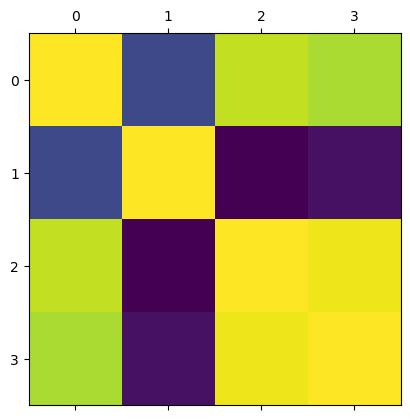

In [40]:
_ = plt.matshow(df.corr(numeric_only=True))

### Plotting Target against Multuple Variables

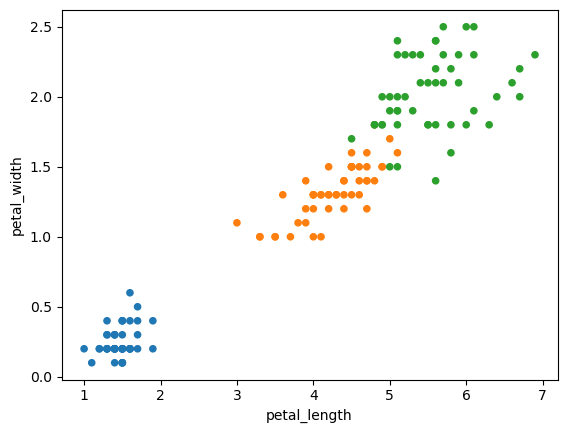

In [54]:
_ = df_colored.plot.scatter("petal_length", "petal_width", c="color")

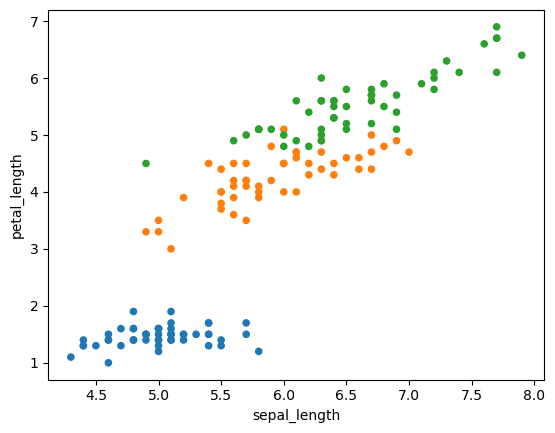

In [55]:
_ = df_colored.plot.scatter("sepal_length", "petal_length", c="color")

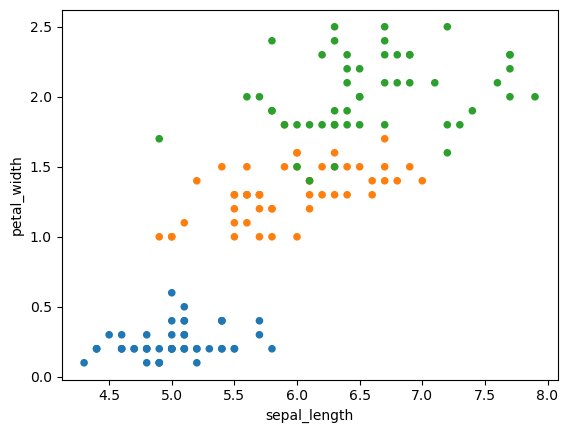

In [56]:
_ = df_colored.plot.scatter("sepal_length", "petal_width", c="color")

## Grouping

In [58]:
df.groupby("species").describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [59]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64